In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print('x_train shape :',x_train.shape)
print('y_train shape :', y_train.shape)
print('x_test shape  :', x_test.shape)
print('y_test shape  :',y_test.shape)

x_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
x_test shape  : (10000, 32, 32, 3)
y_test shape  : (10000, 1)


In [5]:
#shape of single image
x_train[0].shape

(32, 32, 3)

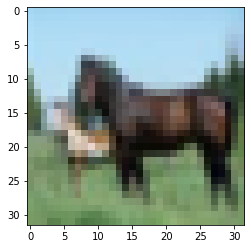

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train.max()

255

In [8]:
#normalize the data
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train.max()

1.0

In [10]:
x_test.max()

1.0

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_test[0]

array([3], dtype=uint8)

In [13]:
y_train_cat = to_categorical(y=y_train, num_classes=10)

In [14]:
y_test_cat = to_categorical(y=y_test, num_classes=10)

In [15]:
y_train[0]

array([6], dtype=uint8)

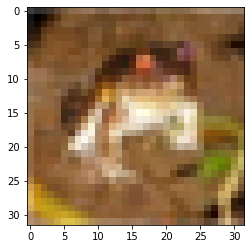

In [16]:
plt.imshow(X=x_train[0])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu' )) #Convolutinal layer
model.add(MaxPool2D(pool_size=(2,2) )) #Pooling layer

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2) ))

model.add(Flatten())
model.add(Dense(units=256, activation='relu')) #hidden layer

model.add(Dense(units=10, activation='softmax' )) #output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [22]:
model.fit(x=x_train, y=y_train_cat, validation_data=(x_test, y_test_cat), epochs=50, callbacks=[early_stop] )

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 165us/sample - loss: 1.5081 - accuracy: 0.4545 - val_loss: 1.3042 - val_accuracy: 0.5385
Epoch 2/50
50000/50000 [==============================] - 6s 127us/sample - loss: 1.1872 - accuracy: 0.5814 - val_loss: 1.1508 - val_accuracy: 0.5929
Epoch 3/50
50000/50000 [==============================] - 6s 124us/sample - loss: 1.0452 - accuracy: 0.6315 - val_loss: 1.0498 - val_accuracy: 0.6325
Epoch 4/50
50000/50000 [==============================] - 6s 123us/sample - loss: 0.9300 - accuracy: 0.6751 - val_loss: 1.0366 - val_accuracy: 0.6379
Epoch 5/50
50000/50000 [==============================] - 6s 126us/sample - loss: 0.8479 - accuracy: 0.7033 - val_loss: 1.0072 - val_accuracy: 0.6539
Epoch 6/50
50000/50000 [==============================] - 6s 127us/sample - loss: 0.7693 - accuracy: 0.7306 - val_loss: 1.0501 - val_accuracy: 0.6441
Epoch 7/50
50000/50000 [==========================

In [23]:
metrics = pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.508087,0.45452,1.304220,0.5385
1,1.187231,0.58138,1.150802,0.5929
2,1.045229,0.63148,1.049765,0.6325
3,0.929997,0.67514,1.036611,0.6379
4,0.847946,0.70330,1.007174,0.6539
5,0.769262,0.73062,1.050106,0.6441
6,0.699428,0.75514,0.996589,0.6597
7,0.632154,0.77878,1.112133,0.6468
8,0.567895,0.80162,1.080536,0.6736
9,0.508268,0.82252,1.109418,0.6603


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
predictions=model.predict_classes(x=x_test)

In [27]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [28]:
print(classification_report(y_true=y_test, y_pred=predictions, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.70      0.65      0.68      1000
  automobile       0.81      0.72      0.76      1000
        bird       0.54      0.56      0.55      1000
         cat       0.47      0.45      0.46      1000
        deer       0.59      0.58      0.59      1000
         dog       0.49      0.62      0.55      1000
        frog       0.69      0.73      0.71      1000
       horse       0.74      0.66      0.70      1000
        ship       0.79      0.74      0.76      1000
       truck       0.72      0.75      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



In [29]:
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[651  26 109  17  33  13  15  18  70  48]
 [ 33 719  17  16   9  17  32   3  37 117]
 [ 48   5 565  86  86  89  68  30  11  12]
 [ 21  16  63 452  79 223  68  41  15  22]
 [ 17   5  97  73 585  86  58  68   6   5]
 [ 19   5  50 163  53 618  39  42   7   4]
 [ 10   1  61  59  44  68 734  11   5   7]
 [ 15   6  35  59  68 100  22 663   6  26]
 [ 71  37  33  20  16  16  13  10 739  45]
 [ 41  67  22  16  11  24  17  10  44 748]]


In [30]:
import seaborn as sns

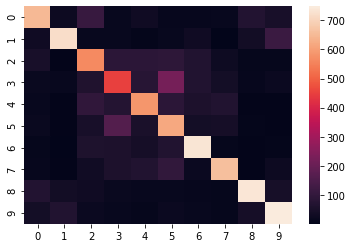

In [31]:
sns.heatmap(data=confusion_matrix(y_true=y_test, y_pred=predictions))

Text(0.5, 1.0, 'True label : [1] Prediction : 1')

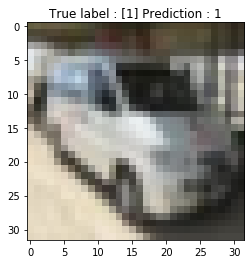

In [32]:
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3), cmap='gray')
plt.title('True label : {} Prediction : {}'.format(y_test[i],predictions[i]))

In [51]:
image = x_test[571]

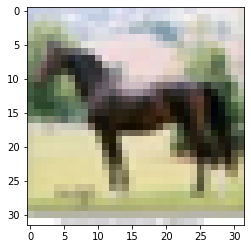

In [52]:
plt.imshow(image)

In [53]:
y_test[571]

array([7], dtype=uint8)

In [54]:
image.shape

(32, 32, 3)

In [55]:
model.predict_classes(image.reshape(1,32,32,3))

array([7], dtype=int64)